# INFO284 Machine Learning gruppe eksamen, vår 2022

### Kanditat nr: 231, 222, 210, 224

Datasettet vi vil analysere og sette modeller på heter «albums_all.csv», dette datasettet inneholder flere attributer. Disse attributene inkluderer, navn på sanger og artister, tempo i sangene, energi, nivå på akustisk, hvor dansbar en sang er og mange flere lignende attributer. Det vi ville oppnå i denne notebooken var å få en god forståelse av dataen i datasettet, gjøre en god forbehandling av dataen og til slutt sette 4 modeller på denne dataen. Vi har to deler med preproscessing hvor den ene delen er rettet mot linear regression og den andre delen er rettet mot decision tree og neural network. Grunnen til at vi valgte å gjøre dette var for å unngå overtilpassing(overfitting) på linear regression modellen vår.

In [50]:
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split
import time
from sklearn.linear_model import LogisticRegression

In [51]:
# Leser dataset og printer shape på dataset.
df = pd.read_csv("albums_all.csv")
df2 = pd.read_csv("albums_all.csv")

print(df.shape)

(2833, 45)


In [52]:
# Rask titt på dataset
df.head()

,name,id,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,"""Fragtime"" Theme Song ""Fragile""",22352,2000,"Moritani Misuzu (CV:Miku Ito), Murakami Haruka...",4,Fragile,11:00a.m.,Fragile - Instrumental,292720,293760.0,...,0.330,0.5390,0.1920,84.008,187.910,84.002,4.0,3.0,4.0,21
1,"""Green n' gold Hits""",106534,2011-09-16,"C.W.A. Cheeseheads With Attitude,",12,"""Packer Face"" (Everybody Vince Lombardi)","""I Love Green Bay"" (Player Mix)","""Beer Wit Da Bret""",213760,181000.0,...,0.965,0.7830,0.3770,119.032,128.002,181.241,4.0,4.0,4.0,14
2,"""Zuhause Live: Das Laune der Natour-Finale"" pl...",23608,2019-03-29,"Die Toten Hosen,",59,Laune der Natur - das Intro - Live in Düsseldo...,Opel-Gang - Live in Düsseldorf 2018,Auswärtsspiel - Live in Düsseldorf 2018,157124,130446.0,...,0.579,0.0475,0.0945,84.010,127.755,99.284,4.0,4.0,4.0,41
3,#Gsnls,8655,2020-08-02,"Surf'n,",8,Lock'n Legs,Capt'n Saven Em,Bloods & Crips,127896,176351.0,...,0.624,0.3840,0.6510,100.053,99.999,95.017,4.0,4.0,4.0,1
4,#Hektarparty,49670,2018-09-21,"Die Draufgänger,",17,Die Hektar hat 2.0,Johnny Deere,Gina Lisa (Spiel mit deinen Glocken),210320,226253.0,...,0.840,0.6650,0.5200,128.041,132.013,135.969,4.0,4.0,4.0,47


In [53]:
# Ser på hva slags D-TYPE attributtene har.
# Som man kan se under har vi 35 floats, 3 int and 6 objects
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2833 non-null   object 
 1   id            2833 non-null   int64  
 2   release_date  2833 non-null   object 
 3   artists       2833 non-null   object 
 4   total_tracks  2833 non-null   int64  
 5   t_name0       2833 non-null   object 
 6   t_name1       2833 non-null   object 
 7   t_name2       2833 non-null   object 
 8   t_dur0        2833 non-null   int64  
 9   t_dur1        2833 non-null   float64
 10  t_dur2        2833 non-null   float64
 11  t_dance0      2833 non-null   float64
 12  t_dance1      2833 non-null   float64
 13  t_dance2      2833 non-null   float64
 14  t_energy0     2833 non-null   float64
 15  t_energy1     2833 non-null   float64
 16  t_energy2     2833 non-null   float64
 17  t_key0        2833 non-null   float64
 18  t_key1        2833 non-null 

In [54]:
#Ser på attributtene 
df.columns

Index(['name', 'id', 'release_date', 'artists', 'total_tracks', 't_name0',
       't_name1', 't_name2', 't_dur0', 't_dur1', 't_dur2', 't_dance0',
       't_dance1', 't_dance2', 't_energy0', 't_energy1', 't_energy2', 't_key0',
       't_key1', 't_key2', 't_mode0', 't_mode1', 't_mode2', 't_speech0',
       't_speech1', 't_speech2', 't_acous0', 't_acous1', 't_acous2', 't_ins0',
       't_ins1', 't_ins2', 't_live0', 't_live1', 't_live2', 't_val0', 't_val1',
       't_val2', 't_tempo0', 't_tempo1', 't_tempo2', 't_sig0', 't_sig1',
       't_sig2', 'popularity'],
      dtype='object')

# Preproscessing for neural network, decision trees og logistic regression

Istedenfor å fjerne outliers på tempo, fant vi heller gjennomsnittet på de tre featuresene som ga oss mindre outliers, imotsetning til duration der vi fortsatt var nødt til å fjerne outliersene.

In [55]:
#Finner gjennomsnittet på utvalgte features og lager dem til en sammenlagt feature
df2["duration"] = df2[['t_dur0', 't_dur1', 't_dur2']].mean(axis=1)
df2["tempo"] = df2[['t_tempo0', 't_tempo1', 't_tempo2']].mean(axis=1)

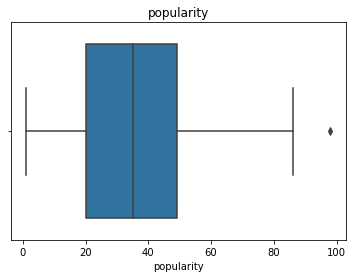

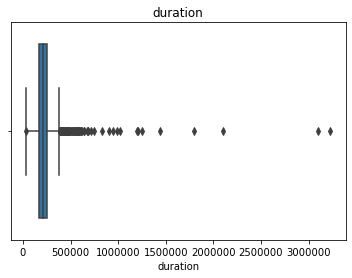

In [56]:
#Ser om det ligger outliers i popularity og duration dataen
for i in df2[["popularity", "duration"]]:
    sns.boxplot(x=i, data=df2)
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(i)
    plt.show()

In [57]:
#Fjerner outliers på utvalgte features
df2 = df2[(df2["popularity"] > 1.0) & (df2["popularity"] < 80)]
df2 = df2[(df2["duration"] > 0) & (df2["duration"] < 1600000)]

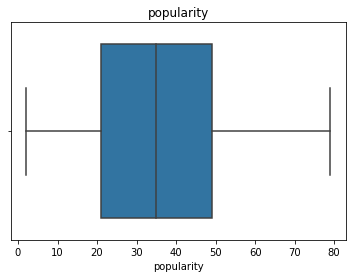

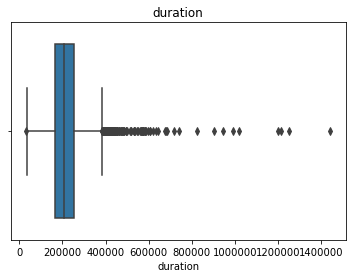

In [58]:
#Sjekker om outliersene har blitt fjernet
for i in df2[["popularity", "duration"]]:
    sns.boxplot(x=i, data=df2)
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(i)
    plt.show()

For å få programmet til å kjøre var vi nødt til å fjerne alle strings. Hvis strings var inkludert i datasettet ville det komt opp feilmeldinger. Ettersom vi allerede hadde laget gjennomsnittet av tempo og duration fjernet vi de featuresene også, men beholdt gjennomsnittsverdien. Siden t-sig0-2 hadde kun hadde fire forskjellige verdier, og alt var outliers, fjernet vi de featuresene også.

In [59]:
#Fjerner features som inneholder strings, i tillegg til spesifikt utvalgte integer features
X2 = df2.drop(columns = [
    "name", "id", "release_date", "artists", "t_name0", "t_name1",
    "t_name2",'t_sig0', 't_sig1', 't_sig2','t_tempo0', 
    "t_tempo1", 't_tempo2',
    't_dur0', 't_dur1', 't_dur2', "popularity"])
#Gir "y" verdien popularity 
y2 = df2["popularity"]
#Sjekker om de utvalgte featuresene har blitt fjernet
X2.keys()

Index(['total_tracks', 't_dance0', 't_dance1', 't_dance2', 't_energy0',
       't_energy1', 't_energy2', 't_key0', 't_key1', 't_key2', 't_mode0',
       't_mode1', 't_mode2', 't_speech0', 't_speech1', 't_speech2', 't_acous0',
       't_acous1', 't_acous2', 't_ins0', 't_ins1', 't_ins2', 't_live0',
       't_live1', 't_live2', 't_val0', 't_val1', 't_val2', 'duration',
       'tempo'],
      dtype='object')

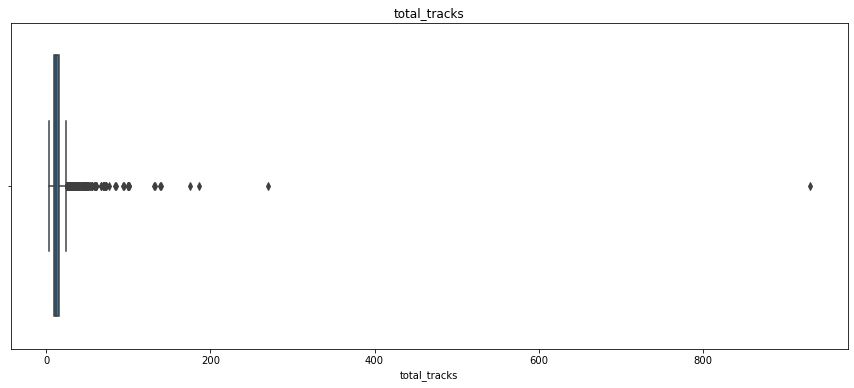

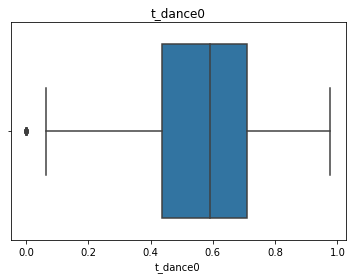

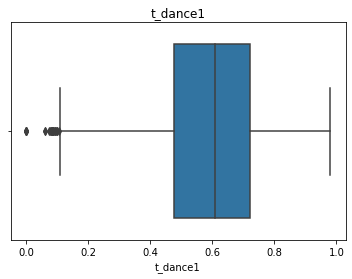

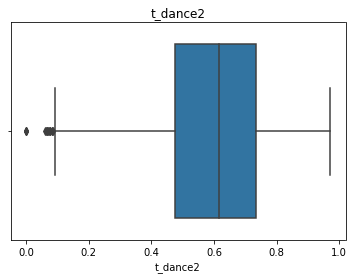

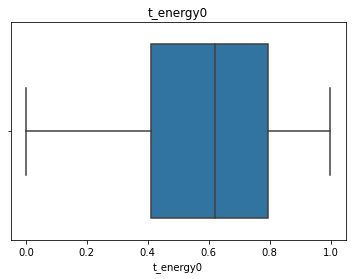

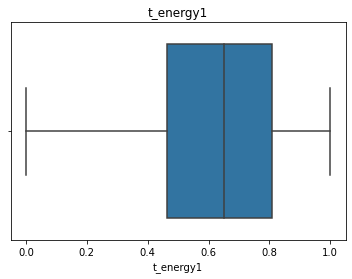

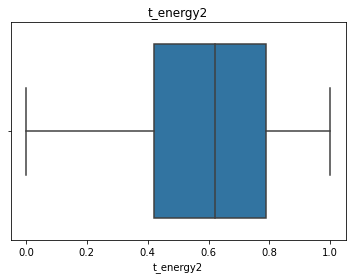

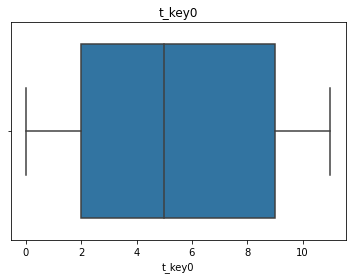

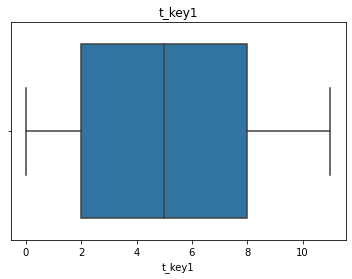

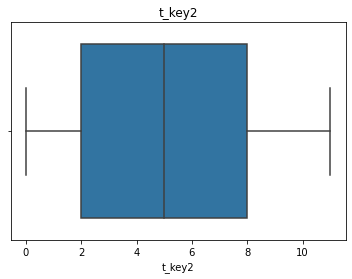

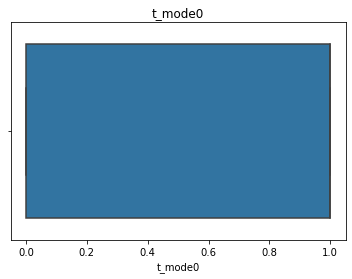

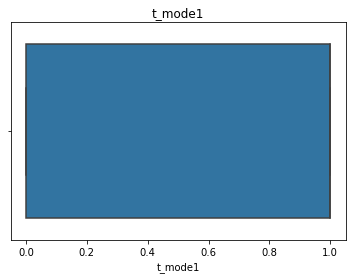

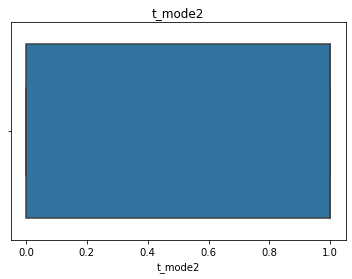

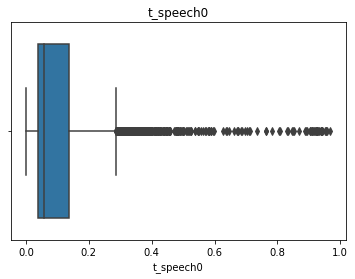

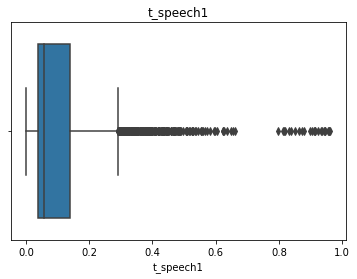

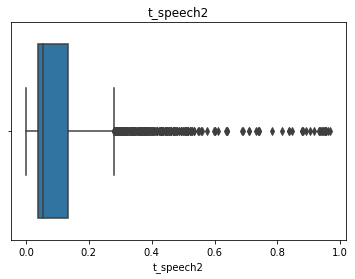

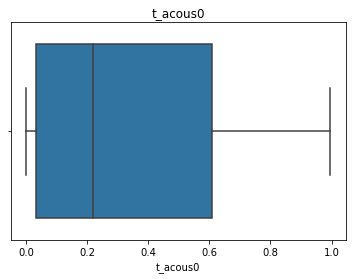

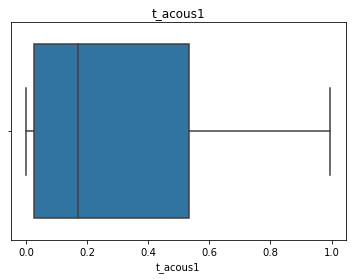

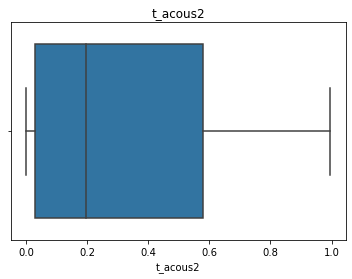

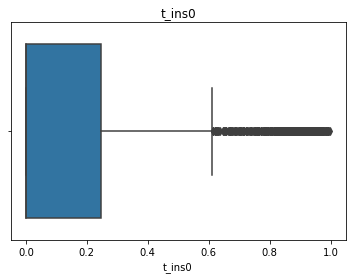

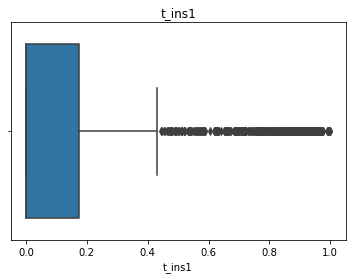

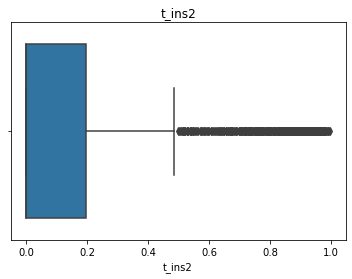

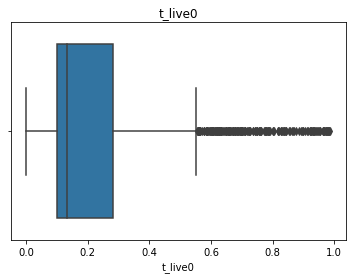

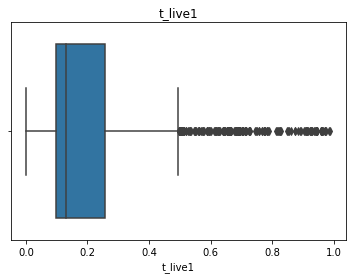

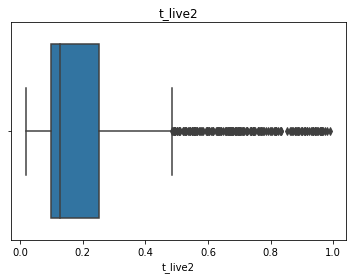

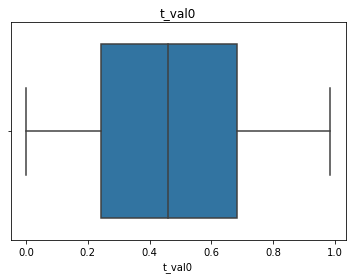

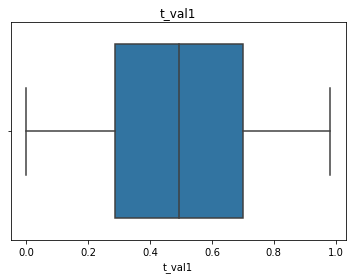

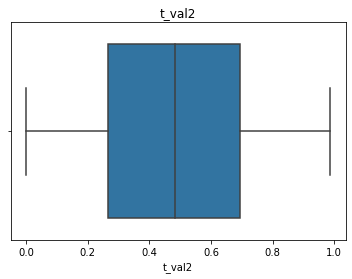

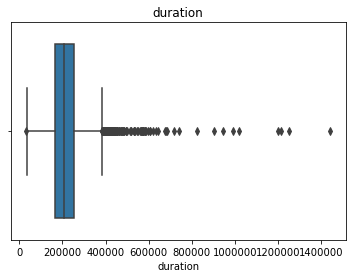

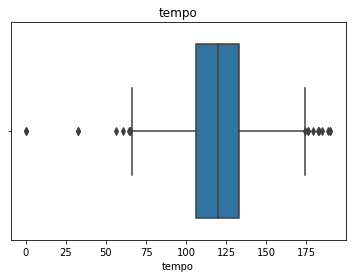

In [60]:
#Sjekker om de finnes flere outliers i "X" verdien
plt.figure(figsize=(15,6))
for i in X2.keys():
    sns.boxplot(x=i, data=df2)
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(i)
    plt.show()

In [61]:
scaler = MinMaxScaler()
scaler.fit(X2)
X2 = scaler.transform(X2)

In [62]:
#Lager training og testing verdiene med importen train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=4)

# Preproscessing for linear regression

In [63]:
# putting all numeric values into one continous column, as seen below
df = df.select_dtypes(include = ['int64','float64'])
df.head()

,id,total_tracks,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,22352,4,292720,293760.0,292733.0,0.549,0.623,0.519,0.559,0.256,...,0.330,0.5390,0.1920,84.008,187.910,84.002,4.0,3.0,4.0,21
1,106534,12,213760,181000.0,245973.0,0.871,0.702,0.416,0.854,0.893,...,0.965,0.7830,0.3770,119.032,128.002,181.241,4.0,4.0,4.0,14
2,23608,59,157124,130446.0,152450.0,0.289,0.328,0.234,0.936,0.995,...,0.579,0.0475,0.0945,84.010,127.755,99.284,4.0,4.0,4.0,41
3,8655,8,127896,176351.0,166968.0,0.886,0.947,0.826,0.818,0.629,...,0.624,0.3840,0.6510,100.053,99.999,95.017,4.0,4.0,4.0,1
4,49670,17,210320,226253.0,211880.0,0.724,0.791,0.784,0.827,0.737,...,0.840,0.6650,0.5200,128.041,132.013,135.969,4.0,4.0,4.0,47


Ser om data-settet har noen manglende verdier, som du kan se under er det tilsynnelatende ingen manglende verdier
i data-settet vårt.

In [64]:
 df.isnull().sum()

id              0
total_tracks    0
t_dur0          0
t_dur1          0
t_dur2          0
t_dance0        0
t_dance1        0
t_dance2        0
t_energy0       0
t_energy1       0
t_energy2       0
t_key0          0
t_key1          0
t_key2          0
t_mode0         0
t_mode1         0
t_mode2         0
t_speech0       0
t_speech1       0
t_speech2       0
t_acous0        0
t_acous1        0
t_acous2        0
t_ins0          0
t_ins1          0
t_ins2          0
t_live0         0
t_live1         0
t_live2         0
t_val0          0
t_val1          0
t_val2          0
t_tempo0        0
t_tempo1        0
t_tempo2        0
t_sig0          0
t_sig1          0
t_sig2          0
popularity      0
dtype: int64

In [65]:
sum(df.duplicated(df.columns))

0

In [66]:
df.corr()

,id,total_tracks,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
id,1.000000,-0.027754,0.008656,0.036968,0.031504,-0.026355,-0.001789,0.000681,-0.019916,-0.004064,...,0.008431,0.015156,0.032852,-0.001297,0.000617,0.002262,-0.041879,-0.003614,0.017398,-0.253561
total_tracks,-0.027754,1.000000,-0.062516,0.019867,-0.015322,-0.059260,-0.059348,-0.054281,-0.075200,-0.061076,...,0.023836,0.015051,0.024551,0.016933,-0.048845,-0.019779,-0.063627,-0.058912,0.004617,0.055853
t_dur0,0.008656,-0.062516,1.000000,0.488271,0.466070,-0.122604,-0.171823,-0.185570,-0.001110,-0.070526,...,-0.086551,-0.107600,-0.106250,0.007964,-0.032638,-0.029588,0.050840,-0.037578,-0.029837,-0.052885
t_dur1,0.036968,0.019867,0.488271,1.000000,0.733632,-0.105042,-0.123532,-0.118182,-0.020909,-0.020909,...,-0.049024,-0.084869,-0.064974,-0.011106,-0.013197,-0.039309,0.021285,0.005725,0.000070,-0.046058
t_dur2,0.031504,-0.015322,0.466070,0.733632,1.000000,-0.109994,-0.129735,-0.155260,-0.017992,-0.013709,...,-0.057442,-0.069139,-0.115064,-0.004348,-0.012784,-0.039324,0.012222,0.001833,0.006489,-0.056048
t_dance0,-0.026355,-0.059260,-0.122604,-0.105042,-0.109994,1.000000,0.631541,0.605970,0.177335,0.131038,...,0.480693,0.326735,0.312633,0.080757,0.050089,0.063301,0.229628,0.131708,0.132268,-0.006613
t_dance1,-0.001789,-0.059348,-0.171823,-0.123532,-0.129735,0.631541,1.000000,0.649472,0.128732,0.178725,...,0.313391,0.458649,0.305252,0.063958,-0.012048,0.040317,0.084748,0.210627,0.179532,0.021690
t_dance2,0.000681,-0.054281,-0.185570,-0.118182,-0.155260,0.605970,0.649472,1.000000,0.138564,0.173243,...,0.308151,0.330936,0.480709,0.065594,0.063653,-0.000050,0.064625,0.138909,0.221097,0.050331
t_energy0,-0.019916,-0.075200,-0.001110,-0.020909,-0.017992,0.177335,0.128732,0.138564,1.000000,0.697616,...,0.334330,0.237767,0.254437,0.205279,0.141527,0.148943,0.168552,0.115615,0.091517,0.066504
t_energy1,-0.004064,-0.061076,-0.070526,-0.020909,-0.013709,0.131038,0.178725,0.173243,0.697616,1.000000,...,0.210205,0.343170,0.237026,0.131163,0.211754,0.141669,0.085729,0.164737,0.110830,0.107671


Ser på fordeling av dataen av de forksjellige attributene i data-settet, her ser vi igjen at t_dance, t_tempo, t_energy og t_val har en god fordeling av data. Dette er en annen grunn til at vi valgte de feauterene som vi gjorde. Vi kan også se at target variablen vår har en realtivt god fordeling av data.

C:\Users\Henrik\AppData\Local\Temp/ipykernel_22384/311011343.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

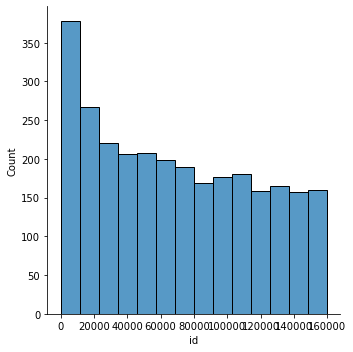

<Figure size 432x288 with 0 Axes>

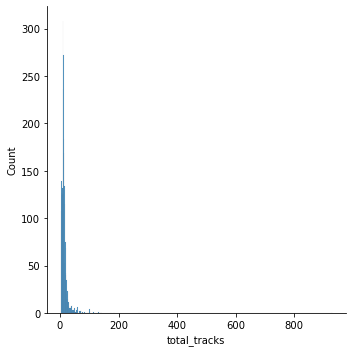

<Figure size 432x288 with 0 Axes>

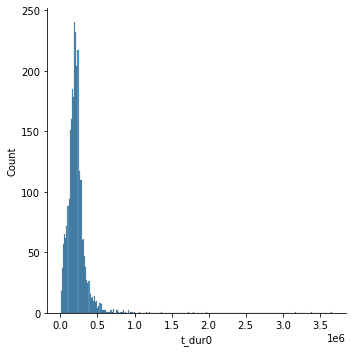

<Figure size 432x288 with 0 Axes>

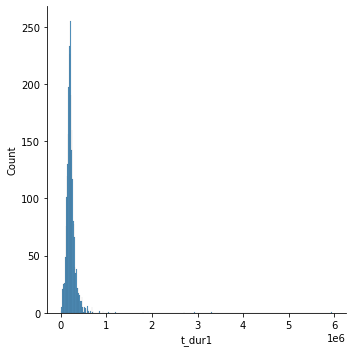

<Figure size 432x288 with 0 Axes>

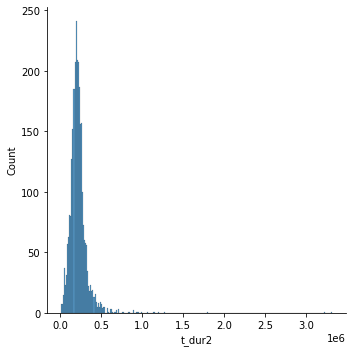

<Figure size 432x288 with 0 Axes>

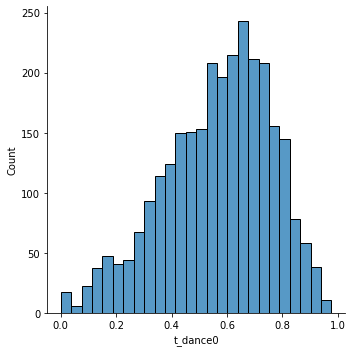

<Figure size 432x288 with 0 Axes>

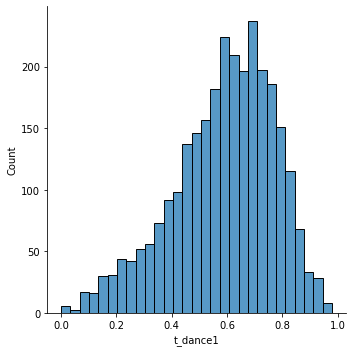

<Figure size 432x288 with 0 Axes>

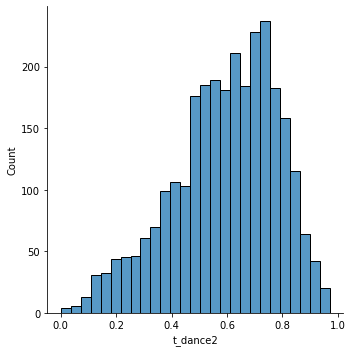

<Figure size 432x288 with 0 Axes>

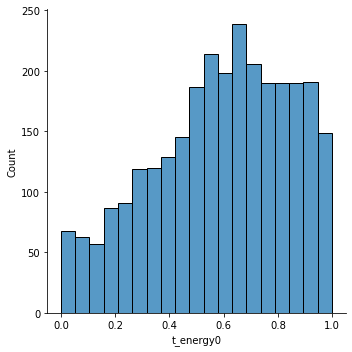

<Figure size 432x288 with 0 Axes>

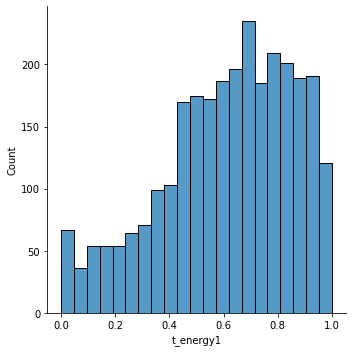

<Figure size 432x288 with 0 Axes>

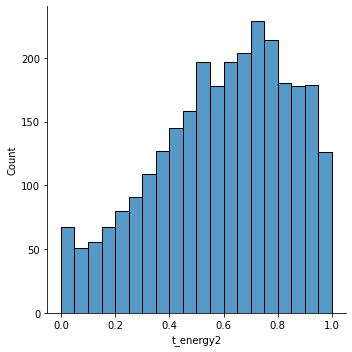

<Figure size 432x288 with 0 Axes>

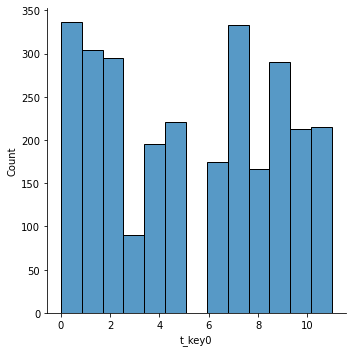

<Figure size 432x288 with 0 Axes>

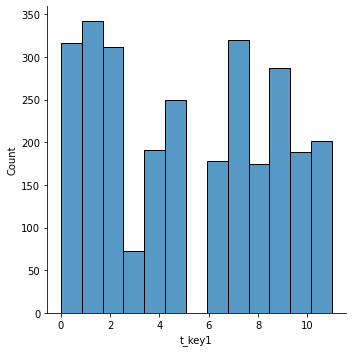

<Figure size 432x288 with 0 Axes>

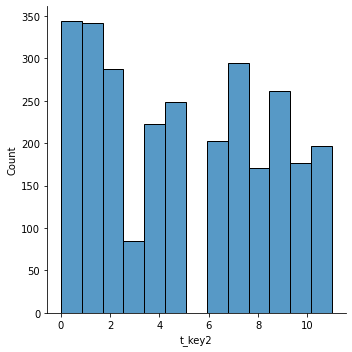

<Figure size 432x288 with 0 Axes>

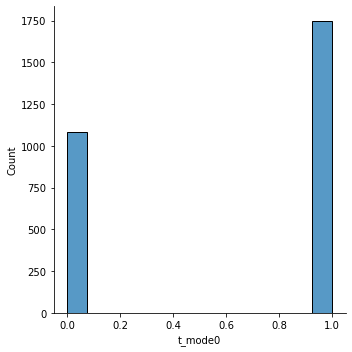

<Figure size 432x288 with 0 Axes>

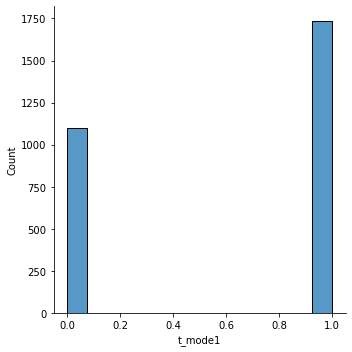

<Figure size 432x288 with 0 Axes>

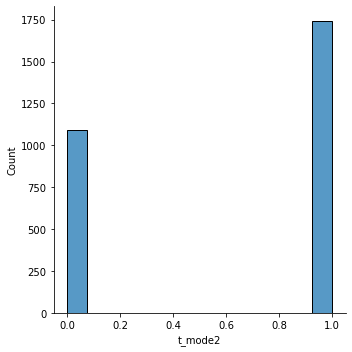

<Figure size 432x288 with 0 Axes>

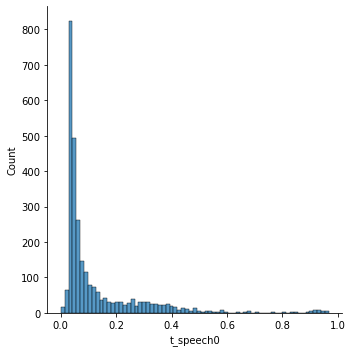

<Figure size 432x288 with 0 Axes>

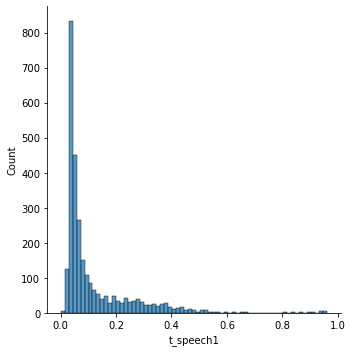

<Figure size 432x288 with 0 Axes>

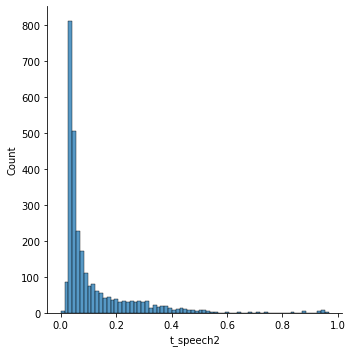

<Figure size 432x288 with 0 Axes>

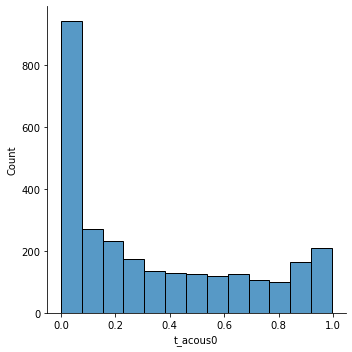

<Figure size 432x288 with 0 Axes>

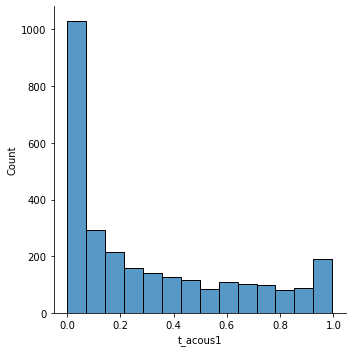

<Figure size 432x288 with 0 Axes>

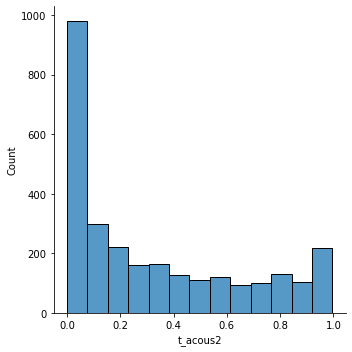

<Figure size 432x288 with 0 Axes>

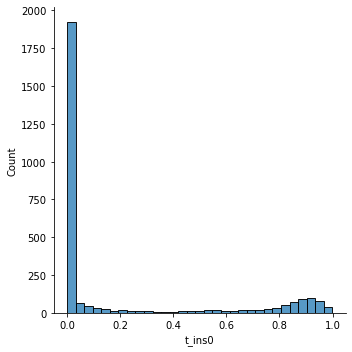

<Figure size 432x288 with 0 Axes>

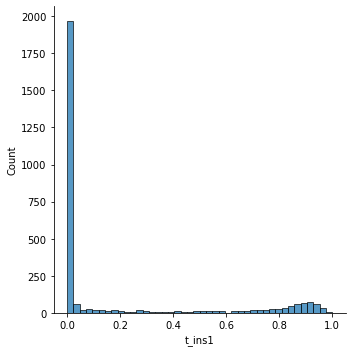

<Figure size 432x288 with 0 Axes>

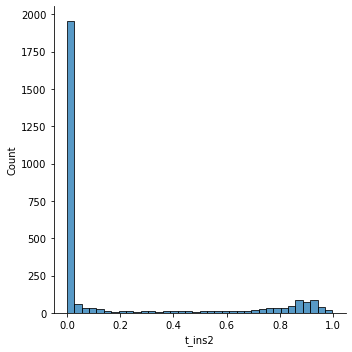

<Figure size 432x288 with 0 Axes>

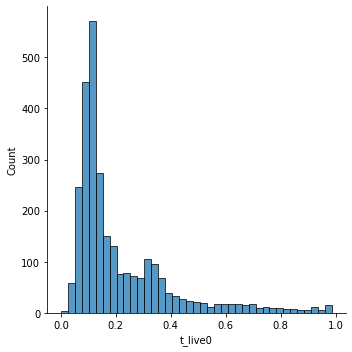

<Figure size 432x288 with 0 Axes>

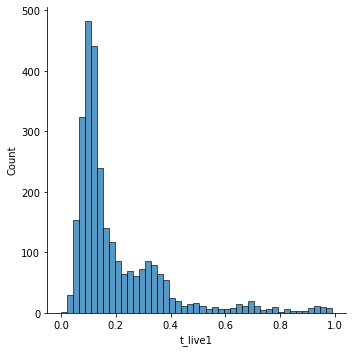

<Figure size 432x288 with 0 Axes>

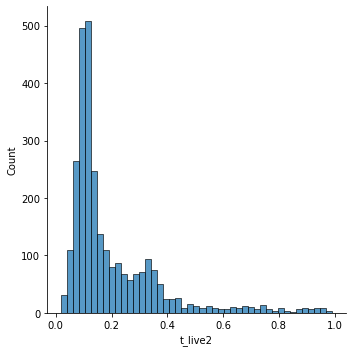

<Figure size 432x288 with 0 Axes>

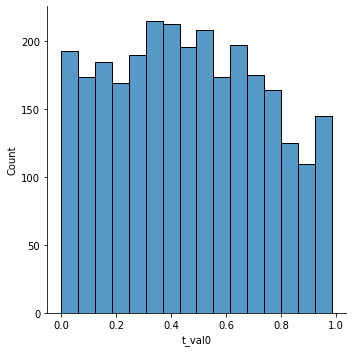

<Figure size 432x288 with 0 Axes>

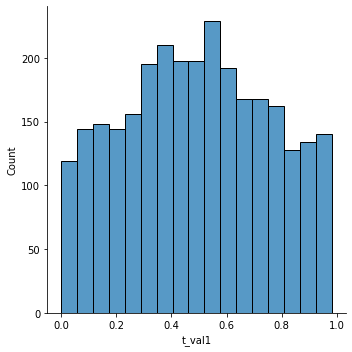

<Figure size 432x288 with 0 Axes>

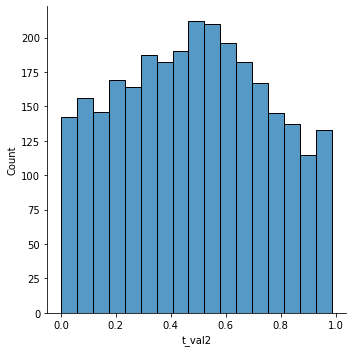

<Figure size 432x288 with 0 Axes>

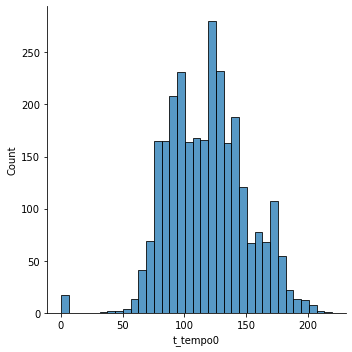

<Figure size 432x288 with 0 Axes>

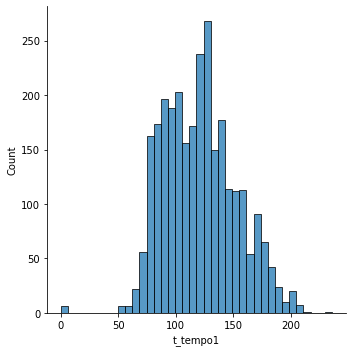

<Figure size 432x288 with 0 Axes>

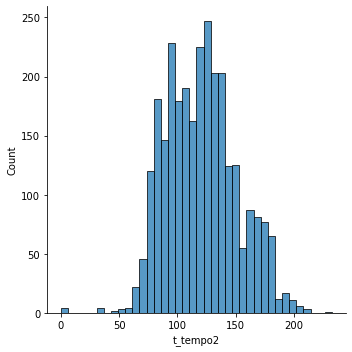

<Figure size 432x288 with 0 Axes>

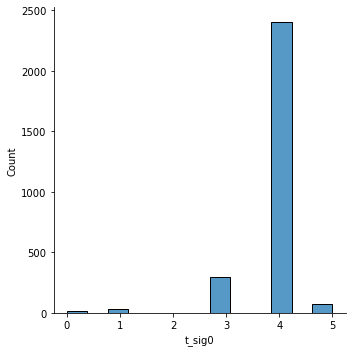

<Figure size 432x288 with 0 Axes>

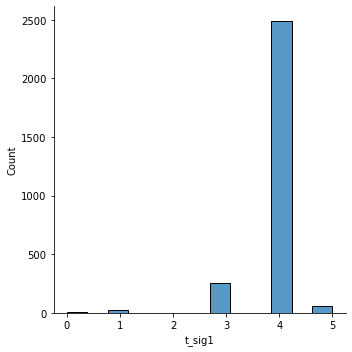

<Figure size 432x288 with 0 Axes>

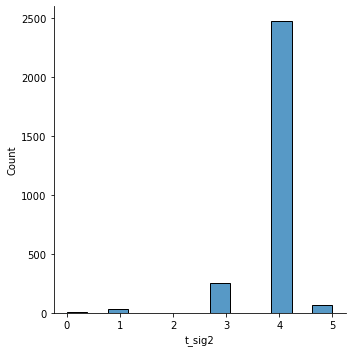

<Figure size 432x288 with 0 Axes>

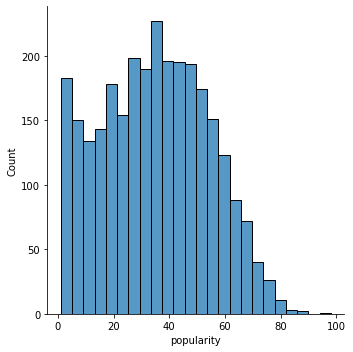

In [67]:
for col in df.columns:
  plt.figure()
  sns.displot(df[col])

Setter sammen attributene vi vil bruke ved å finne gjennomsnittet på 0, 1 og 2 av attributen.

In [68]:
df["energy"] = df[['t_energy0', 't_energy1', 't_energy2']].mean(axis=1)
df["tempo"] = df[['t_tempo0', 't_tempo1', 't_tempo2']].mean(axis=1)
df["dance"] = df[['t_dance0', 't_dance1', 't_dance2']].mean(axis=1)
df["valence"] = df[['t_val0', 't_val1', 't_val2']].mean(axis=1)

Bruker scatter plot med popularity som Y og attributene vi valgte å gå videre med for å se om vi kunne finne en trend mellom Y og X i noen av dem. Her var det desverre ikke mye verdifull informasjon å hente, det vi fikk ut av denne scatter ploten var at attributene mangler enn underliggende trend når vi skal se på for mye korrelasjon de har til popularity.

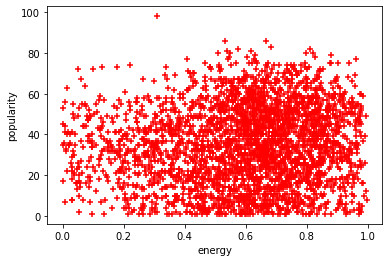

In [69]:
%matplotlib inline
plt.xlabel("energy")
plt.ylabel("popularity")
plt.scatter(df.energy, df.popularity, color="red", marker="+")

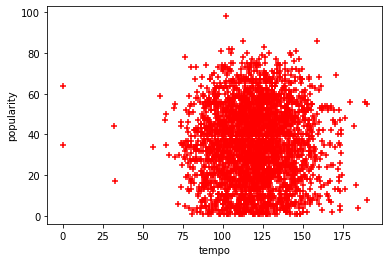

In [70]:
%matplotlib inline
plt.xlabel("tempo")
plt.ylabel("popularity")
plt.scatter(df.tempo, df.popularity, color="red", marker="+")

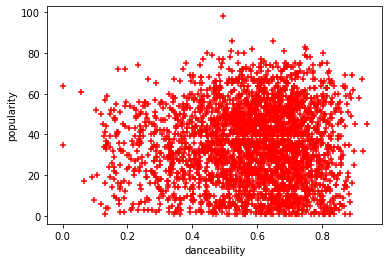

In [71]:
%matplotlib inline
plt.xlabel("danceability")
plt.ylabel("popularity")
plt.scatter(df.dance, df.popularity, color="red", marker="+")

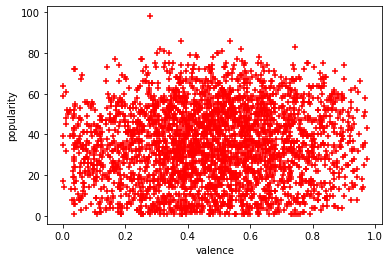

In [72]:
%matplotlib inline
plt.xlabel("valence")
plt.ylabel("popularity")
plt.scatter(df.valence, df.popularity, color="red", marker="+")

Her går videre med de featurene vi har valgt for å se om de har noen outliers som muligens må bli fjernet. For å se etter outliers brukte vi sns boxplot. Under kan man se at tempo, energy og danceaility hadde et par outliers som vi fjernet. Ettersom at vi lagde modellene før vi fjernet noen outliers, fant vi ut av at det å fjerne disse outlierene hjalp oss å få en litt bedre score. For å unngå overfitting valgte vi å fjerne outliersene manuelt slik at vi hadde en ide av hvor mye av dataen vi fjernet.adde et par outliers som vi fjernet. Ettersom at vi lagde modellene før vi fjernet noen outliers, fant vi ut av at det å fjerne disse outlierene hjalp oss å få en litt bedre score. For å unngå overfitting valgte vi å fjerne outliersene manuelt slik at vi hadde en ide av hvor mye av dataen vi fjernet.

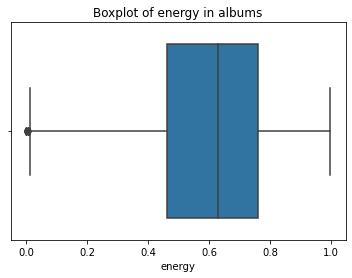

In [73]:
plt.figure()
sns.boxplot(x='energy', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of energy in albums')
plt.show()

fjerner outliers

In [74]:
df = df[(df['energy'] < 1.0) & (df['energy'] > 0.1)]

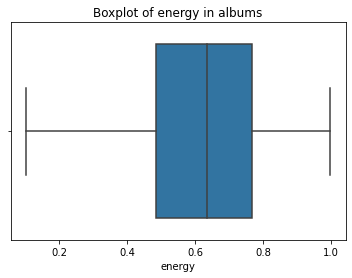

In [75]:
plt.figure()
sns.boxplot(x='energy', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of energy in albums')
plt.show()

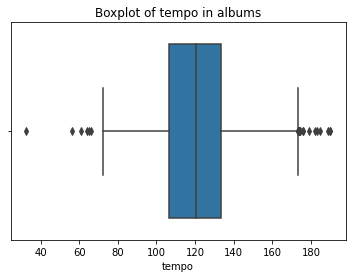

In [76]:
plt.figure()
sns.boxplot(x='tempo', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of tempo in albums')
plt.show()

fjerner outliers

In [77]:
df = df[(df['tempo'] < 170) & (df['tempo'] > 70)]

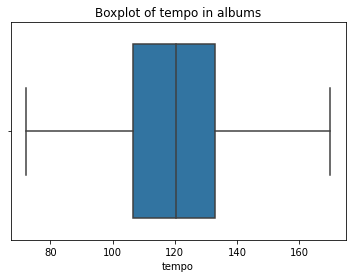

In [78]:
plt.figure()
sns.boxplot(x='tempo', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of tempo in albums')
plt.show()

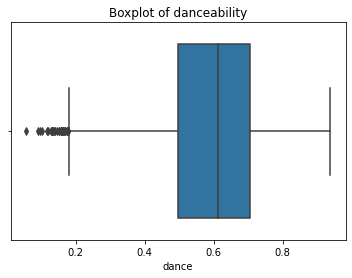

In [79]:
plt.figure()
sns.boxplot(x='dance', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of danceability')
plt.show()

fjerner outliers

In [80]:
df = df[(df['dance'] < 1.0) & (df['dance'] > 0.2)]

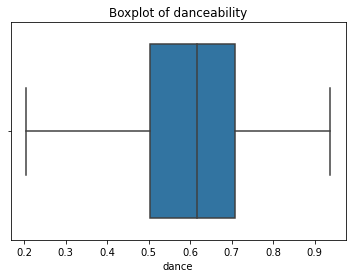

In [81]:
plt.figure()
sns.boxplot(x='dance', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of danceability')
plt.show()

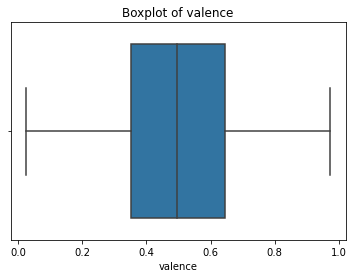

In [82]:
plt.figure()
sns.boxplot(x='valence', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of valence')
plt.show()

Visualisering av atrributenes forhold til target variable etter fjerning av outliers.

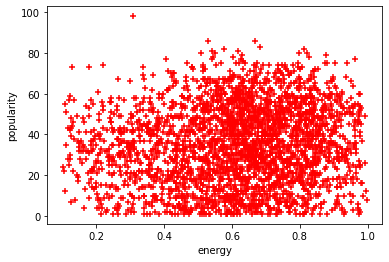

In [83]:
%matplotlib inline
plt.xlabel("energy")
plt.ylabel("popularity")
plt.scatter(df.energy, df.popularity, color="red", marker="+")

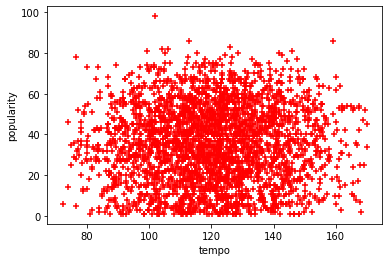

In [84]:
%matplotlib inline
plt.xlabel("tempo")
plt.ylabel("popularity")
plt.scatter(df.tempo, df.popularity, color="red", marker="+")

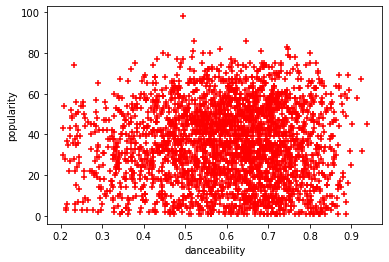

In [85]:
%matplotlib inline
plt.xlabel("danceability")
plt.ylabel("popularity")
plt.scatter(df.dance, df.popularity, color="red", marker="+")

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[["energy"]] = df[["energy"]].apply(le.fit_transform)
df[["tempo"]] = df[["tempo"]].apply(le.fit_transform)
df[["dance"]] = df[["dance"]].apply(le.fit_transform)
df[["valence"]] = df[["valence"]].apply(le.fit_transform)
df[["popularity"]] = df[["popularity"]].apply(le.fit_transform)

In [87]:
from sklearn.model_selection import train_test_split
Y = df["popularity"]
X = df[["dance", "energy", "tempo", "valence"]]

X.shape , Y.shape

((2662, 4), (2662,))

Splitter data-setet inn trening og test set, en del av data-setet vil bli brukt til trening mens den andre delen(test set) vi bli brukt for evaluering. Spliten vil ha en ratio på 70:30, argumnetet X vil være uavhengige variabler mens Y(popularitet) vil være vår target variabel.

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 2)
print(X_train)
print(y_train)

      dance  energy  tempo  valence
2261   1115     655   2298      669
2325   1321    1717   1750      543
2685     69     956    463      243
2246    238    1097   1565     1541
1065    676     973   1680      398
...     ...     ...    ...      ...
2683    715    1088   2346     1480
2501    156    1355    106      174
1697   1114     825   2014     1500
2710   1295    1193   2336     1816
2744   1052     306   1860     1079

[1863 rows x 4 columns]
2261     0
2325    28
2685    18
2246    23
1065    16
        ..
2683    23
2501    20
1697     0
2710    29
2744     9
Name: popularity, Length: 1863, dtype: int64


In [89]:
X_train.shape , y_train.shape

((1863, 4), (1863,))

In [90]:
X_test.shape , y_test.shape

((799, 4), (799,))

In [91]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(X_train)

X_train = scale.transform(X_train)

X_test = scale.transform(X_test)

print(X_train)
print(y_train)

[[ 0.65855568 -0.57221235  1.2832175  -0.65965116]
 [ 1.14436647  1.58547083  0.56864014 -0.90640303]
 [-1.80823119  0.03933439 -1.10957347 -1.4939075 ]
 ...
 [ 0.65619737 -0.22682051  0.91288909  0.96773623]
 [ 1.08305055  0.52085125  1.33276848  1.58657427]
 [ 0.50998247 -1.2812815   0.7120772   0.14327162]]
2261     0
2325    28
2685    18
2246    23
1065    16
        ..
2683    23
2501    20
1697     0
2710    29
2744     9
Name: popularity, Length: 1863, dtype: int64


# Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression 

In [93]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [ 0.30054429  1.86832337 -0.19021869  0.36535199]
lr.intercept_: 34.44068706387547


Ols scoren til denne modellen er utrolig dårlig som vil indekere at modellen sliter med å finne en lineær sammenheng. Dette var i grunn ikke veldig overraskende ettersom at vi ikke så en underliggende trend i scatter ploten som vi brukte i preproscessing vår. For å få en bedre ide om hvorfor scoren ble så dårlig vil vi se på RMSE og R2.

In [94]:
#OLS
print("Training set score:  {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:  {:.2f}".format(lr.score(X_test,y_test)))

Training set score:  0.01
Test set score:  0.01


En av de vanligste metodene brukt for å evaluere regresjons modeller kalles root mean squared error, eller RMSE. Den grunnleggende ideen bak RMSE er å se hvor dårlig modelens spådommer er sammenlignet til de faktiske observerte verdiene. Så en bra score på RMSE vil være et lavt tall mens en dårlig score vil være høye tall. Under kan vi se at RMSE for trening er 18.82 og for testing er den 19.24. Dette forteller oss at data punktene ikke er konsentrert rundt regresjons linjene men er heller spred ut.

In [95]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
linreg_train_predict = lr.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, linreg_train_predict))
print("RMSE for training: %.2f"%rmse, "\n")

linreg_test_predict = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, linreg_test_predict))
print("RMSE for testing: %.2f"%rmse, "\n")

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, linreg_test_predict))

RMSE for training: 18.82 

RMSE for testing: 19.24 

Mean squared error: 370.25


Bestemmelseskoeffisienten eller R2 lar oss måle styrken mellom respons og prediktor variablen(popularity). R2 gir oss en score mellom 0,0 og 1,0, en høy score vil være bra mens en lav score vil være dårlig i dette tilfellet. Under kan vi se at vi har en lav r2 score som indekerer at det er en lav styrke mellom forholde til feauterene våre og  prediktor variablene. 

In [96]:
R = lr.score(X_train, y_train)
print(R) #R squared

0.011365062889867605


Bruker trening og test settet som blir brukt på decision tree og neural network for å sammenligne med trening og test settet laget for linear regression modellen. 

In [97]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X2_train, y2_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [ 1.33620656e+02 -5.82387169e+00  2.28953639e+00  7.13455920e+00
 -2.57695802e+00  7.66574388e+00  3.27954357e+00  4.61819362e-01
 -2.68001184e+00  6.69442390e-01  9.85007120e-01  1.46279247e+00
 -8.54650747e-02 -4.00436607e-01 -1.68311296e+01 -1.29468846e+01
 -1.66475068e+00  2.05956713e+00  7.59242869e-01 -3.92156355e+00
 -6.29535484e+00 -3.94216043e+00 -7.55122794e+00 -2.75186245e-01
  9.98879663e-01 -4.81655674e+00 -3.21985435e+00  1.38682660e+00
 -2.32899841e+01 -6.41351910e+00]
lr.intercept_: 43.39662071708358


Under kan vi se at training settet scorte litt bedre enn når vi brukte forbehandling rettet mot denne modellen. Men vi kan også se at trening settet scorte my høyere enn test settet som vil indekere at det er overtilpassing(overfitting), dette var det vi fryktet, dette bekrefter antagelsene våre om at dette ville skje. 

In [98]:
#OLS
print("Training set score:  {:.2f}".format(lr.score(X2_train,y2_train)))
print("Test set score:  {:.2f}".format(lr.score(X2_test,y2_test)))

Training set score:  0.11
Test set score:  0.02


In [99]:
from sklearn.linear_model import Ridge
lr = Ridge(alpha=30).fit(X_train,y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
print("Training set score:  {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:  {:.2f}".format(lr.score(X_test,y_test)))

lr.coef_: [ 0.29459056  1.8356808  -0.18095499  0.37006086]
lr.intercept_: 34.44068706387547
Training set score:  0.01
Test set score:  0.01


In [100]:
from sklearn.linear_model import Lasso
lr = Lasso(alpha=0.2).fit(X_train,y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
print("Training set score:  {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:  {:.2f}".format(lr.score(X_test,y_test)))

lr.coef_: [ 0.1435561   1.65613534 -0.          0.27473766]
lr.intercept_: 34.44068706387547
Training set score:  0.01
Test set score:  0.01


# Neural Network

Neural Networks er den andre modellen vi har valgt. Her har vi også valgt å sette en maks iterasjoner på 1000 per gjennomgang. Dette gjorde vi for å begrense mengden data og tid modellen tar å kjøre. Dette gjør at vi får noe forskjellig score fra hver gang du kjører modellen, i tillegg får man kjørt gjennom varierte mengder av dataen vi har valgt å ha med i modellene. Første vi gjorde i modellen var å sette en variabel som heter neural_neworks. Denne tar inn MLPRegressor (som også er importet i toppen av dokumentet). Det er her vi setter maks iterasjoner på 1000. Til slutt kjøres modellen med test-settet og får en train score og en test score. Disse varierer som sagt litt fra hver gang modellen kjører, men dette er på grunn av at vi har satt max_iter til 1000. Vi har også valgt og formatere scorene til bare 2 desimaler.

In [101]:
neural_networks = MLPRegressor(max_iter = 1000)

neural_networks.fit(X2_train, y2_train)
print("Train score: {:.4f} ".format(neural_networks.score(X2_train, y2_train)))

neural_networks.fit(X2_test, y2_test)
print("Test score: {:.4f} ".format(neural_networks.score(X2_test, y2_test)))

C:\Users\Henrik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 0.3034 
Test score: 0.2994 


C:\Users\Henrik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Decision tress

Siden decision tree, random forest og gradient boosting er relativt like i funksjonaliteten, har vi valgt å inkludere disse tre modellene som én modell, for å så sammenligne resultatene. Forskjellen på modellene går ut på antall decision trees, og når i prosessen man kommer frem til resultatene. DecisionTreeRegressor består av ett enkelt decision tree. Det er en lett forståelig og oversiktelig modell, men kan fort få problemer med for eksempel overfitting. Derfor med RandomForestRegressor vil det være mer sannsynlig å komme frem til rett resultat. Ettersom random forest består av mange flere data punkter, er det rimelig å anta at man vil få et mer presist resultat. Istedenfor å gå dypt inn på ett tre, vil random forest lage flere små og grunnere trær, som vil forhindre overfitting. Random forest finner resultatet på slutten av søket, mens GradientBoostingRegressor vil finne resulatene underveis i prosessen. Random forest vil lage hvert tre separat, mens gradient boosting vil lage ett tre om gangen i rekkefølge. Med dette datasettet vil det være mest effektivt med random forest siden modellen fungerer best til å oppdage fler-klasse datasett, mens gradient boosting fungerer bedre på ubalansert data.

In [102]:
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X2_train,y2_train)
print("Training score: {:.4f}".format(tree.score(X2_train,y2_train)))
print("Test score: {:.4f}".format(tree.score(X2_test, y2_test)))

Training score: 0.1224
Test score: 0.1209


In [103]:
forest = RandomForestRegressor(n_estimators = 100, max_depth = 3)
forest.fit(X2_train,y2_train)
print("Training score: {:.4f}".format(forest.score(X2_train,y2_train)))
print("Test score: {:.4f}".format(forest.score(X2_test, y2_test)))

Training score: 0.1614
Test score: 0.1479


In [104]:
gboost = GradientBoostingRegressor(n_estimators = 10)
gboost.fit(X2_train,y2_train)
print("Training score: {:.4f}".format(gboost.score(X2_train,y2_train)))
print("Test score: {:.4f}".format(gboost.score(X2_test, y2_test)))

Training score: 0.1402
Test score: 0.1146


Resultatene på de forskjellige decision trees modellene gir tall som er forventet. Random forrest har høyest score med
lite overfitting. Unntaket for predikasjonen var at DecisionTreeRegressor hadde nesten null overfitting, og hadde minst overfitting av de tre modellene.

# Ridge

In [105]:
from sklearn.linear_model import Ridge
lr = Ridge(alpha=30).fit(X2_train,y2_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
print("Training set score:  {:.2f}".format(lr.score(X2_train,y2_train)))
print("Test set score:  {:.2f}".format(lr.score(X2_test,y2_test)))

lr.coef_: [ 1.94061257 -3.34889413  0.69660508  3.01336942 -0.60938173  3.77097178
  2.22613689  0.52703958 -2.76772199  0.32545492  1.01838199  1.35766896
  0.03803059 -2.8316418  -8.55323617 -7.15385795 -0.2618048   0.70725143
 -0.01160309 -3.46429278 -5.07819033 -3.82692467 -4.36285786 -0.90636889
 -0.05590861 -4.070235   -1.22048825  2.16530279 -6.18315746 -2.60718438]
lr.intercept_: 40.701846989841066
Training set score:  0.09
Test set score:  0.07


# Konklusjon

I dette arbeidet har vi prøvd å finne en korrelasjon mellom attributer i sanger og popularitet. Basert på scorene vi oppnådde vil vi ikke si at vi var suksessfulle, men dette var ikke noe som overrasket oss. Mens vi gjorde forbehandling og analysering av dataen fant vi fort ut av at det ville bli vanskelig å lage gode modeller som kunne forutsi popularitene på albumene vi fikk tildelt ettersom at vi nesten ikke fant noen underliggende trend i dataen. Totalt sett kan vi konkludere med at ved å bruke disse variablene kan vi ikke forutsi popularitene til sanger. Hvis vi skulle økt den prediktive kraften til modellene våre ville vi prøvd mer å gjøre mer attribut scaling og muligens utforsket datasettet med andre modeller.

# Kilde liste

Glen, S(2019, 28. Juli), Decision Tree vs Random Forest vs Gradient Boosting Machines: Explained Simply. Hentet 11.05.2022 fra: https://www.datasciencecentral.com/decision-tree-vs-random-forest-vs-boosted-trees-explained/

Chauhan, S, Nagesh S(2019, 19. Juli), From Data Pre-processing to Optimizing a Regression Model Performance: KDnuggets. Hentet 11.05.2022 fra: https://www.kdnuggets.com/2019/07/data-pre-processing-optimizing-regression-model-performance.html

http://localhost:8889/notebooks/Downloads/linear_regression%20(1).ipynb

http://localhost:8889/notebooks/Downloads/neural.ipynb

http://localhost:8889/notebooks/Downloads/veryGoodA.ipynb